<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/07%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07 군집화

### 01) K-평균 알고리즘 이해
k-평균 : 군집화에서 가장 일반적으로 사용되는 알고리즘으로 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법

군집 중심점 : 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다. 모든 데이터 포인트에서 더이상 중심점의 이도잉 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법.

- k-평균이 어떻게 동작하는지 시각적으로 표현하기
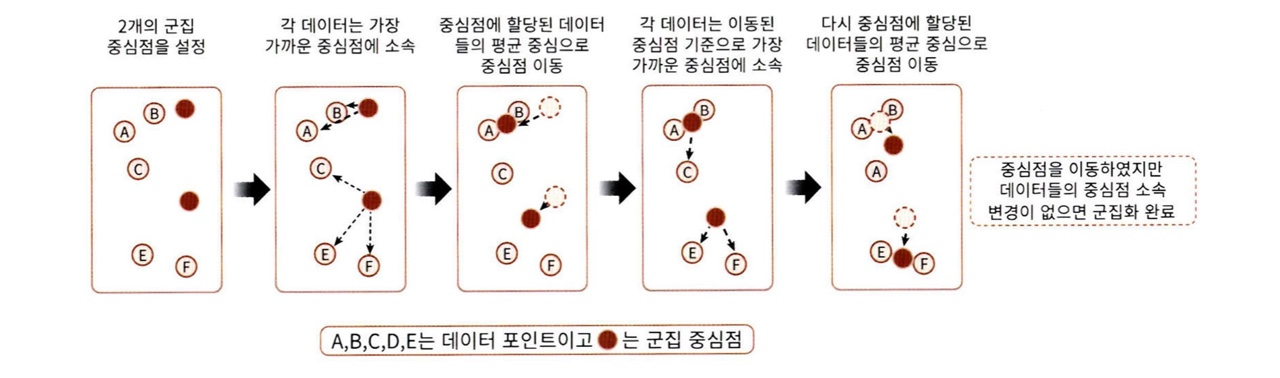

<과정>

1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음. 

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨.
3. 소속이 결정되고 군집 중심점을 소속된 데이터의 평균 중심으로 이동함. 
4. 중심점이 변경되었으니, 다시 위치 재조정해서 더 가까운 중심점으로 데이터 이동함.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동함. 
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화 완료

<k-평균의 장점>
* 일반적인 군집화에서 가장 많이 사용
* 알고리즘이 쉽고 간결

<k-평균의 단점>
* 거리 기반 알고리즘으로 속성의 개수가 많을 경우 정확도가 떨어짐 ( 이를 위해 pca로 차원 감소 적용해야할 수도 있음)
* 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
* 몇 개의 군집을 선택해야 할 지 가이드 하기 어려움.


### 사이킷런 KMeans 클래스 소개

KMeans 클래스 : K-평균을 구현함. 

- 중요 파라미터

* n_clusters : 군집화할 개수, 즉 군집 중심점의 개수
* init : 초기에 군집 중심점의 좌표를 설정할 방식 , 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
* max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동없으면 종료

- KMeans 클래스

* fit(데이터 세트) 또는 fit_transform(데이터세트) 메서드 이용하여 수행
* labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_ : 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음. 

### k- 평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침(sepal), 꽃잎(petal)의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고, 이를 분류값과 비교해보자. 

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris=load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 3개 그룹으로 군집화, KMeans 객체를 만들고 여기에 fit을 수행함.
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
#fit을 수행하여 irisDF데이터에 대한 군집화 수행 결과가 kmeans객체 변수로 반환됨.
#kmeans의 label_ 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
#실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인.
irisDF['target']=iris.target #붓곷 데이터 세트의 target값을 'target'칼럼으로 지정
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count() #개수비교하기 위해
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


분류 타깃이 0값인 데이터는 1번 군집으로 그룹핑 됨. TARGET1값 데이터는 2개만 2번 군집으로 그루핑됨. 나머지 48개는 0번으로 그루핑됨. 하지만 TARGET2 값 데이터는 골고루 분산돼 그루핑 됨. 

In [5]:
#붓꽃 데이터 세트의 군집화를 시각화
#데이터 세트 속성이 4개이므로 2차원 평면에 적합치 않아 PCA이용하여 4개 속성을 2개로 차원축소해야함.
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


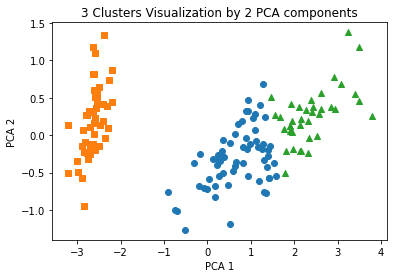

In [6]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출.o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA components')
plt.show()
     

동그라미와 세모는 상당수준 분리돼있지만 네모만큼 명확하게 분리되지 않음.


---

### 군집화 알고리즘 테스트를 위한 데이터 생성

군집화용 데이터 생성기 : make_blobs() , make_classification() API
* 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의군집이 분포될 수 있게 데이터 생성가능함.
* make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼있음.
*  make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음. 
* 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용 : make_circle() , make_moon() API

- make_blobs() 호출 파라미터
* n_samples : 생성할 총 데이터 개수, 디폴트는100개
* n_features : 데이터의 피처 개수
* centers : int값 설정시 군집의 개수를 나타내고 ndarray형태시 개별 군집 중심점의 좌표를 의미
* cluster_std: 생성될 군집 데이터의 표준편차.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)
#y target 값의 분포를 확인
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape는 (200,2)

군집 타깃 데이터 세트인 y의 shape은 (200,) 그리고 3개의 cluster의 값은 [0,1,2]이며 각각 67,67,66개로 균일하게 구성됨.

In [8]:
#데이터 가공 편리하게 하기 위해 데이터 세트를 변경하여 저장
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


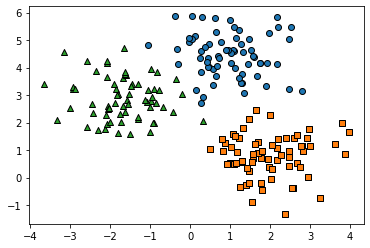

In [9]:
#make_blob()로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인해보기
target_list=np.unique(y)
#각 타깃별 산점도의 마커 값.
markers=['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0,target==1,target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

이번에는 이렇게 만들어진 데이터 세트에 KMeans군집화를 수행한 뒤 군집별로 시각화해보자.


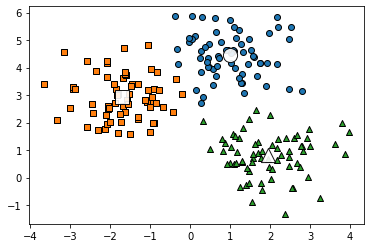

In [10]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

#군집된 label유형별로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
  
  #군집 별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker=''%label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음.

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


-> 거의 대부분 잘 매핑됨.

* clouster_std가 작을수록 군집 중심에 데이터가 모여있다.

---------------
## 02) 군집평가(cluster Evaluation)

대부분의 군집화 데이터 세트는 위처럼 비교할 만한 타깃 레이블을 가지고 있지 않다. 또한 군집화는 분류와 유사해 보일 수 있으나 성격이 많이 다르다. 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.

### 실루엣 분석의 개요

실루엣 분석 : 군집화 평가 방법
* 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄.
* 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

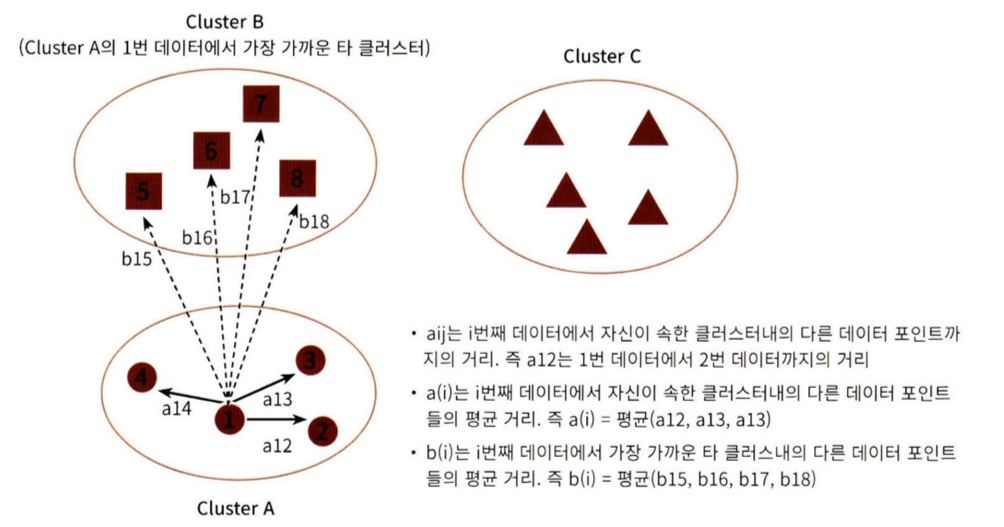


해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 : a(i)
해당 데이터포인트가 속하지 않은 군집 중 가까운 군집과의 평균 거리 : b(i)

실루엣 계수 s(i)는 다음과 같다.
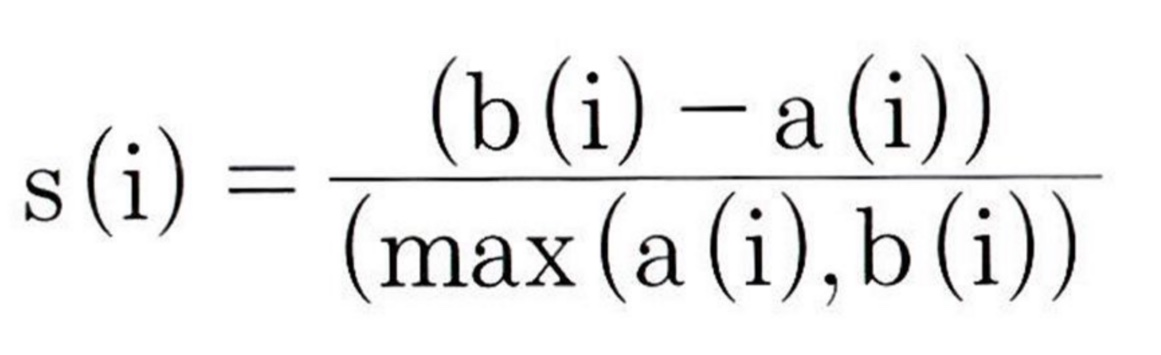

이 값은 -1에서 1 사이의 값을 가지며 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. 

-값은 아예 다른 군집에 데이터 포인트가 할당 됐음을 의미함.

- 사이킷런에서 제공하는 메서드
* sklearn.metrics.silhouette_samples(X,labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환

* sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환

- 좋은 군집화
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score값은 0~1사이 값을갖고 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 시루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 

### 붓꽃 데이터 세트를 이용한 군집 평가


In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)
     

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값이 약 0.553이다. 1번 군집의 경우 0.8이상의 높은 실루엣 계수 값을 나타내고 있다. 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문.

In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

* 전체 데이터의 평균 실루엣계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음.  

In [14]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [15]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

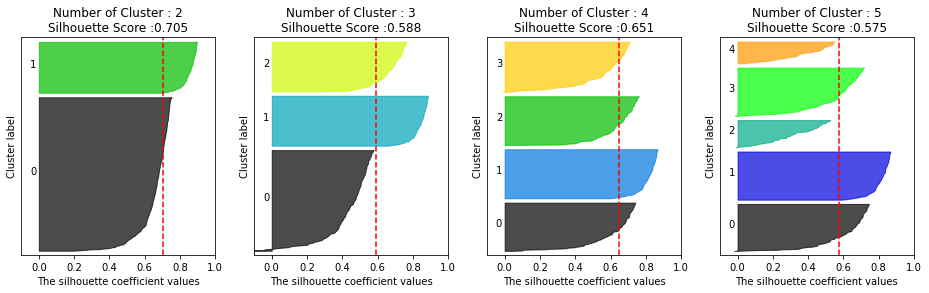

In [16]:
#make_blobs()를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)


#군집 개수가 2개,3개,4개,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

-> 4개의 군집일 때 가장 최적화됨.

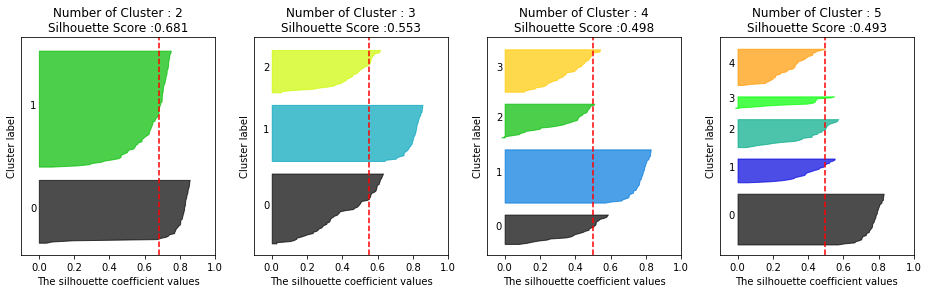

In [17]:
#붓꽃 데이터를 이용해 k-평균 수행시 최적의 군집 개수를 알아보자.ㅇ
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

-> 군집 개수를 2개로 하는 것이 가장 좋아보임. 

직관적으로 이해하기 쉽지만 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 특히 몇만건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 api를 개인용 pc에서 수행할 겨웅 메모리 부족 등의 에러가 발생하기 쉬움



---
## 03) 평균이동

### 평균 이동의 개요
평균이동: 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 k-평균과 다른 점은 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다는 것이다.
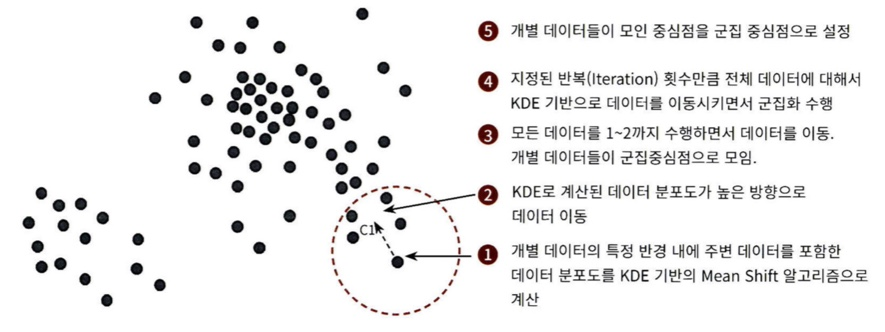
1. KDE 
 
 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 방법임.

 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 

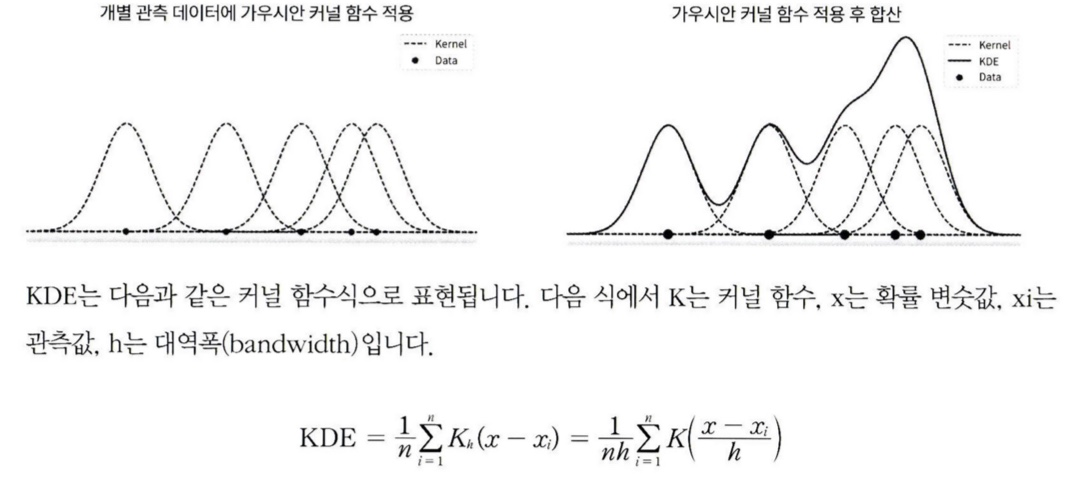
2. 대역폭 H 

KDE형태를 부드러운 형태로 평활화 하는데 적용되며 이 H를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 좌우한다.


다음은 h값을 증가시키면서 변화되는 KDE를 나타낸다. 

작은 값 H : 좁고 뾰족한 KDE를 가지게 되며, 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움.

높은 값 H : 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합 하기 쉬움.

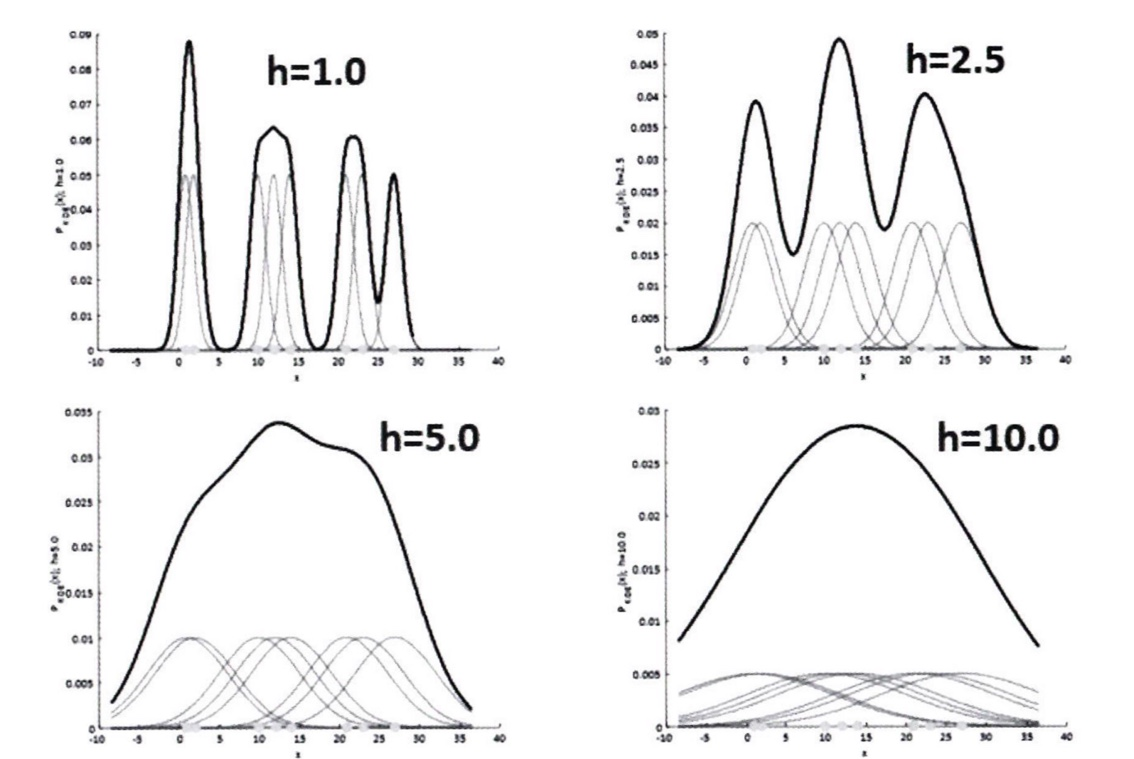


- MeanShift 클래스 : 사이킷런에서 제공한 평균 이동 군집화
- estimate_bandwidth() 함수 : 최적의 대역폭 계산

In [18]:

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)
meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


-> 지나치게 세분화 됨. 

In [19]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


-> 잘 군집화 됨. Meanshift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 중요함. 

In [20]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [21]:
#estimate_bandwidth() 로 측정된 bandwidth를 평균 입력값으로 적용해 동일한 make_blos()데이터 세트에 군집화 수행
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
clsuter_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


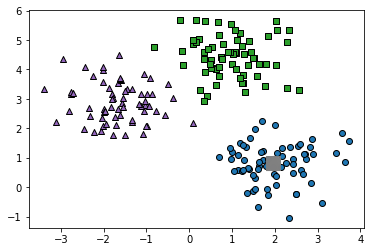

In [22]:
#군집 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  ceter_x_y=centers[label]
  
  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,edgecolor='k',marker=''%label)

plt.show()

target값과 label값이 1:1로 잘 매칭됨.

In [23]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       0                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점

이상치의 영향력이 크지 않고 유연한 군집화가 가능하다.

미리 군집의 개수를 정할 필요가 없다.

- 평균 이동의 장점

알고리즘 수행시간이 오래걸리고 band-width의 크기에 따른 군집화 영향도가 매우 크다. 



---
## 04) GMM (Gaussian Mixture Model)

### GMM
gmm 군집화 : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

* 정규분포로도 알려진 가우시안 분포
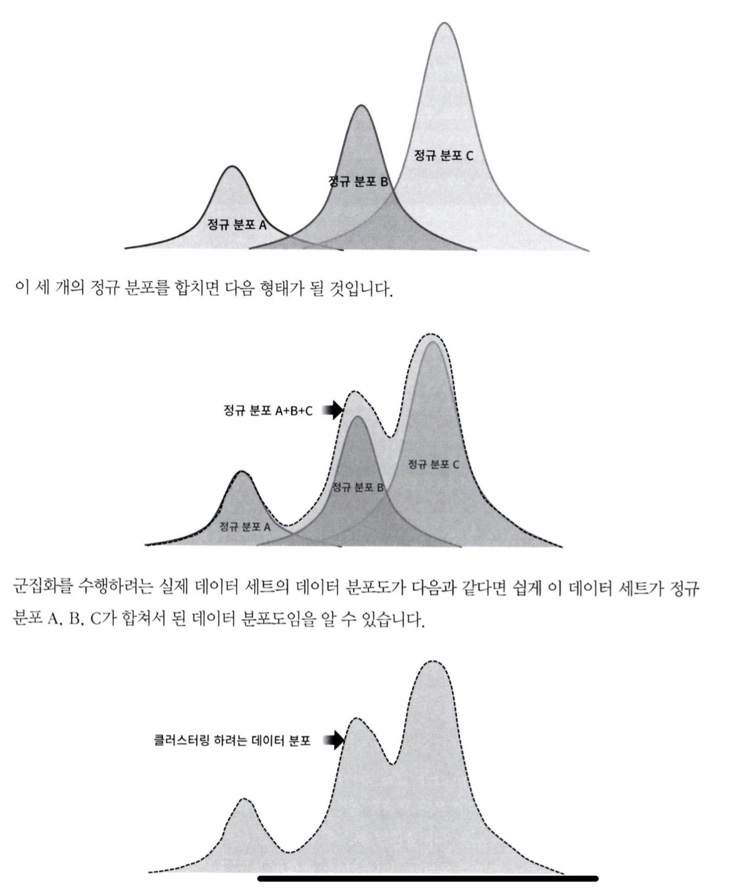

전체 데이터 세트는 서로 달느 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 gmm군집화 방식이다. 

### GMM을 이용한 붓꽃 데이터 세트 군집화 


In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

#좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환

irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [25]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster'칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target


#target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)  

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


-> k-평균 군집화 결과보다 더 효과적인 분류

In [26]:
#k-평균 군집화 수행 결과
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


-> 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM군집화에 더 효과적이라는 의미.



---
### GMM과 k-평균의 비교
* KMeans는 원형의 범위에서 군집화를 수행한다.

* 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 

- visualize_cluster_plot(clusterobj , dataframe, label_name, iscluster=True)함수인자

* clusterobj : 사이킷런의 군집 수행 객체
*  dataframe: 피처 데이터 세트와 label값을 가진 df
*  label_name: 군집화 결과 시각화일 경우 df내의 군집화 label칼럼명, make_blobs결과 시각화일 경우는 df내의 target칼럼명
* iscluster: 사이킷런 cluster객체가 군집 중심 좌표를 제공하면 true

In [27]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

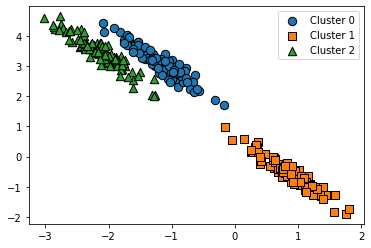

In [28]:
from sklearn.datasets import make_blobs

#make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)
#feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y

#생성된 데이터 세트를 target벼로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

-> kmeans의 군집화 정확성이 떨어지게 된다. 

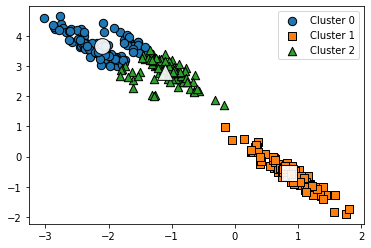

In [29]:
#3개의 군집 기반 Kmeans를 X_aniso데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

-> KMeans로 군집화 수행시 주로 원형 영역 위치로 개별 군집화가 되면ㅅ ㅓ원하는 방향으로 구성되지 않음. 

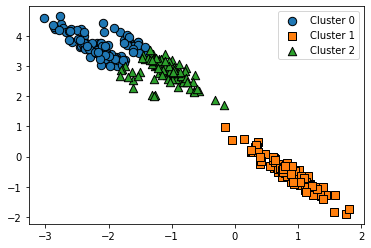

In [30]:
#GMM 군집화 수행
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture은 cluster_centers_속성이 없으므로 iscenter을 false로 설정
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=False)


->데이터가 분포된 방향에 따라 정확하게 군집화 됨.

GMM은 k-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화 되지 않는다. 

In [31]:
#make_blobs()의 target값과 kmeans,gmm의 군집 label값을 서로 비교해 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gausian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gausian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


-> KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target값과 어긋나는 경우가 발생하고 있다. 하지만 GMM의 경우 군집이 target값과 잘 매핑돼있다.



---

## 05) DBSCAN

### DBSCAN 개요

DBSCAN : 밀도 기반 군집화의 대표적인 알고리즘

* 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능

- 구성 중요 파라미터

 * 입실론 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
 * 최소 데이터 개수 : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는지 아닌지에 따라
 * 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
 * 이웃 포인트 : 주변 영역 내에 위치한 타 데이터
 * 경계 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
 * 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

 ----------------
 ### DBSCAN 적용하기 - 붓꽃 데이터 세트


In [32]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
     

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


<dbscan_cluster>

0과 1외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. -1인 것은 노이즈에 속하는 군집을 의미한다. 

target 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다. DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다. 

### DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 함수로 시각화하자.

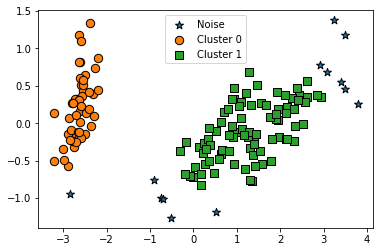

In [33]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2러 피처 데이터 세트 변환
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visualize_clsuter_2d()함수는 ftr1,ftr2칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0] 
irisDF['ftr2']=pca_transformed[:,1] 

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)
     

-> 별값은 모두 노이즈이다. 

DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음

eps의 값을 크게 하면 ㄱ반경이 커져 포함하느 ㄴ데이터가 많아지므로 노이즈 데이터 개수가 작아진다.

min_samples를 크게하면 반경내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커진다. 

In [34]:
#eps 증가시키기
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_clsuter']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_clsuter'].value_counts()
print(iris_result)

target  dbscan_clsuter
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_clsuter, dtype: int64


-> 노이즈 군집인 -1이 3개밖에 없다. 

In [35]:
#eps 0.6으로 유지하고 min_samples를 16으로 늘리기
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_clsuter']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_clsuter'].value_counts()
print(iris_result)

target  dbscan_clsuter
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_clsuter, dtype: int64


- 노이즈 데이터가 기존보다 많이 증가함
--------------
### DBSCAN 적용하기 - make_circles() 데이터 세트



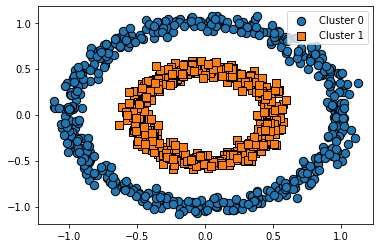

In [36]:
from sklearn.datasets import make_circles
X,y= make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

-> make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함


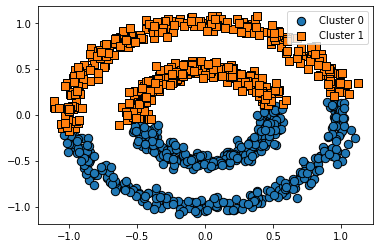

In [37]:
#K-평균으로 make_circles() 데이터 세트를 군집화
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels


visualize_cluster_plot(None,clusterDF,'kmeans_cluster',iscenter=False)

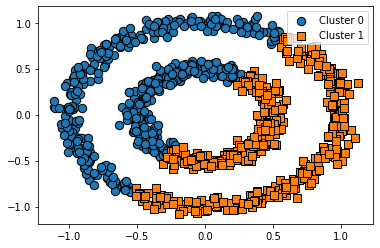

In [38]:
#GMM으로 make_circles()데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

-> 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않음.

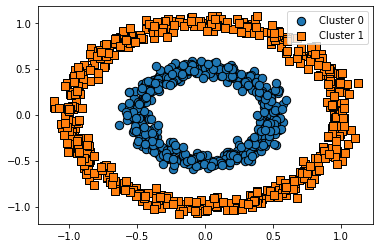

In [39]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

-> 원하는 방향으로 정확히 군집화가 됨.